## AI - Assignment 4 - Practical part
### Professors: Fadaei and Yaghoob Zade
### Mohamad Mahdi Samadi (810101465)


# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

df = pd.read_excel("DataSet.xlsx")
df.columns = ["Crime", "Residential", "Industry", "Charles", "Gas", "Room","Age","Distance",
              "Highway", "Tax", "Teacher", "Black", "Low ppl", "Price"]
df_before_preprocess = df.copy()
target = "Price"

*CRIM:* crime rate by town.

*ZN:* percentage of the land dedicated for residential purposes

*INDUS:* proportion of nonretail business areas per town

*CHAS:* indicates whether a land is near to the Charles River. dummy variables are the type of variables that represent categorical information with numerical values.

*NOX:* amount of nitric oxide (NO) and nitrogen dioxide (NO2) present in a given volume of air. These gasses are harmful to human health.

*RM:* rooms per houses.

*AGE:* proportion of houses that were built before 1940 and are currently occupied by the owner. We could understand important information from it. A higher proportion shows that the area has historical buidings. Also higher percentage of owner-occupied units often correlates with increased community stability.

*DIS:* The distances to five Boston employment centers.

*RAD:* measures how easily people of the area can access major highways.

*TAX:* amount of property tax that homeowners must pay for every $10,000 of their property.

*PTRATIO:* avg number of students assigned to a single teacher.

*B:*

#### $ \text{Bk} = \frac{N_{black}}{N_{black} + N_{non-black}} \quad \text{B} = 1000 \times (\text{Bk} - 0.63)^2 $

*LSTAT:* percentage of a population considered to be in a lower socioeconomic status or class.

*MEDV:* middle price of owner-occupied homes.

FIrst we examine general structure of the data using pandas dataframe methods.

In [2]:
df.head(n=7)

,Crime,Residential,Industry,Charles,Gas,Room,Age,Distance,Highway,Tax,Teacher,Black,Low ppl,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9


In [3]:
desc = df.describe().round(3)
desc = desc.transpose()
desc["null count"] = df.isnull().sum().apply(lambda x: str(x) + " missing" if x > 0 else "filled")
desc["null perc"] = desc["null count"].apply(lambda x: 0 if x == "filled" else 100 * int(x[:len(x) - len(" missing")]) / len(df)).round(3)
desc["Type"] = df.apply(lambda x: x.dtype)
desc.transpose()

,Crime,Residential,Industry,Charles,Gas,Room,Age,Distance,Highway,Tax,Teacher,Black,Low ppl,Price
count,506.0,506.0,506.0,480.0,506.0,506.0,506.0,479.0,506.0,506.0,506.0,486.0,506.0,452.0
mean,1.269,13.295,9.205,0.175,1.101,15.68,58.745,6.212,78.063,339.318,42.615,336.821,11.538,23.75
std,2.399,23.049,7.17,0.38,1.647,27.22,33.104,6.527,203.542,180.67,87.585,121.175,6.065,8.809
min,0.0,0.0,0.0,0.0,0.385,3.561,1.137,1.13,1.0,20.2,2.6,0.32,1.73,6.3
25%,0.049,0.0,3.44,0.0,0.449,5.962,32.0,2.426,4.0,254.0,17.0,370.415,6.878,18.5
50%,0.145,0.0,6.96,0.0,0.538,6.322,65.25,3.918,5.0,307.0,18.9,390.885,10.38,21.95
75%,0.82,18.1,18.1,0.0,0.647,6.949,89.975,6.341,24.0,403.0,20.2,395.63,15.015,26.6
max,9.967,100.0,27.74,1.0,7.313,100.0,100.0,24.0,666.0,711.0,396.9,396.9,34.41,50.0
null count,filled,filled,filled,26 missing,filled,filled,filled,27 missing,filled,filled,filled,20 missing,filled,54 missing
null perc,0.0,0.0,0.0,5.138,0.0,0.0,0.0,5.336,0.0,0.0,0.0,3.953,0.0,10.672


## Visualization Tools

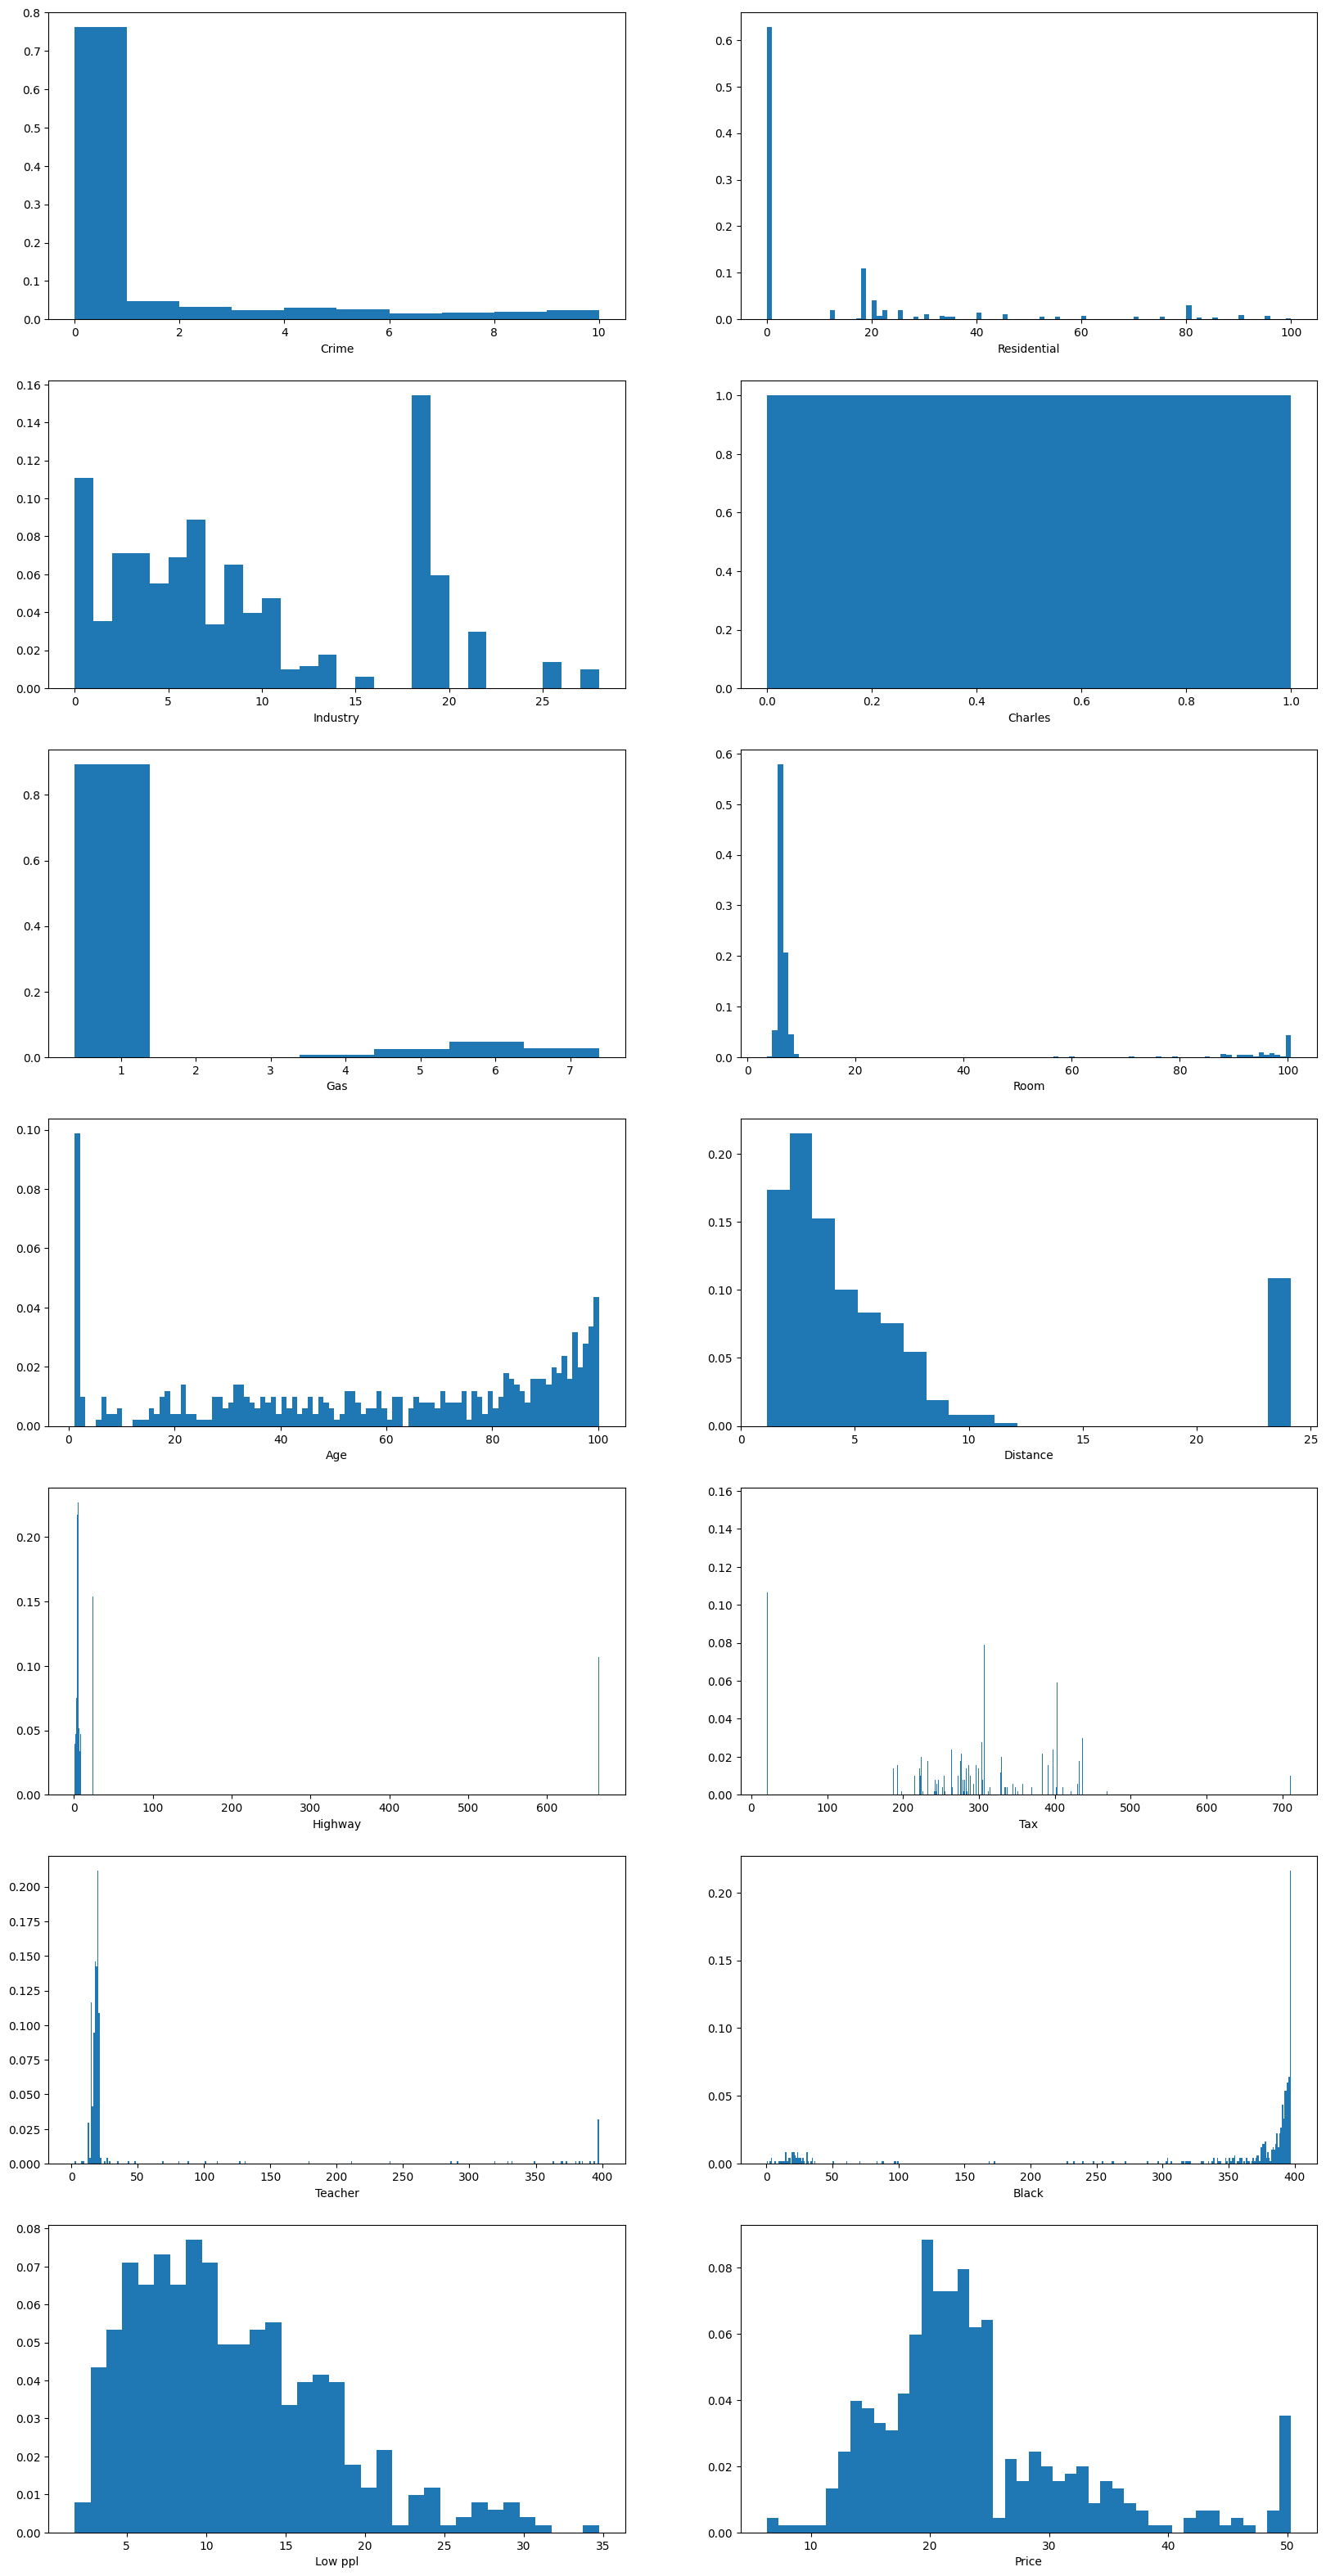

In [4]:
def plot_unique_values(df):
    nrow, ncol = len(df.columns)//2, 2
    fig, ax = plt.subplots(ncols=ncol, nrows=nrow, figsize=(20, 40))
    cols = df.columns
    for i in range(len(cols)):
        ax[i // ncol, i % ncol].set_xlabel(cols[i])
        ax[i // ncol, i % ncol].hist(df[cols[i]], bins=np.arange(min(df[cols[i]]), max(df[cols[i]])+1), density=True)
        
plot_unique_values(df)

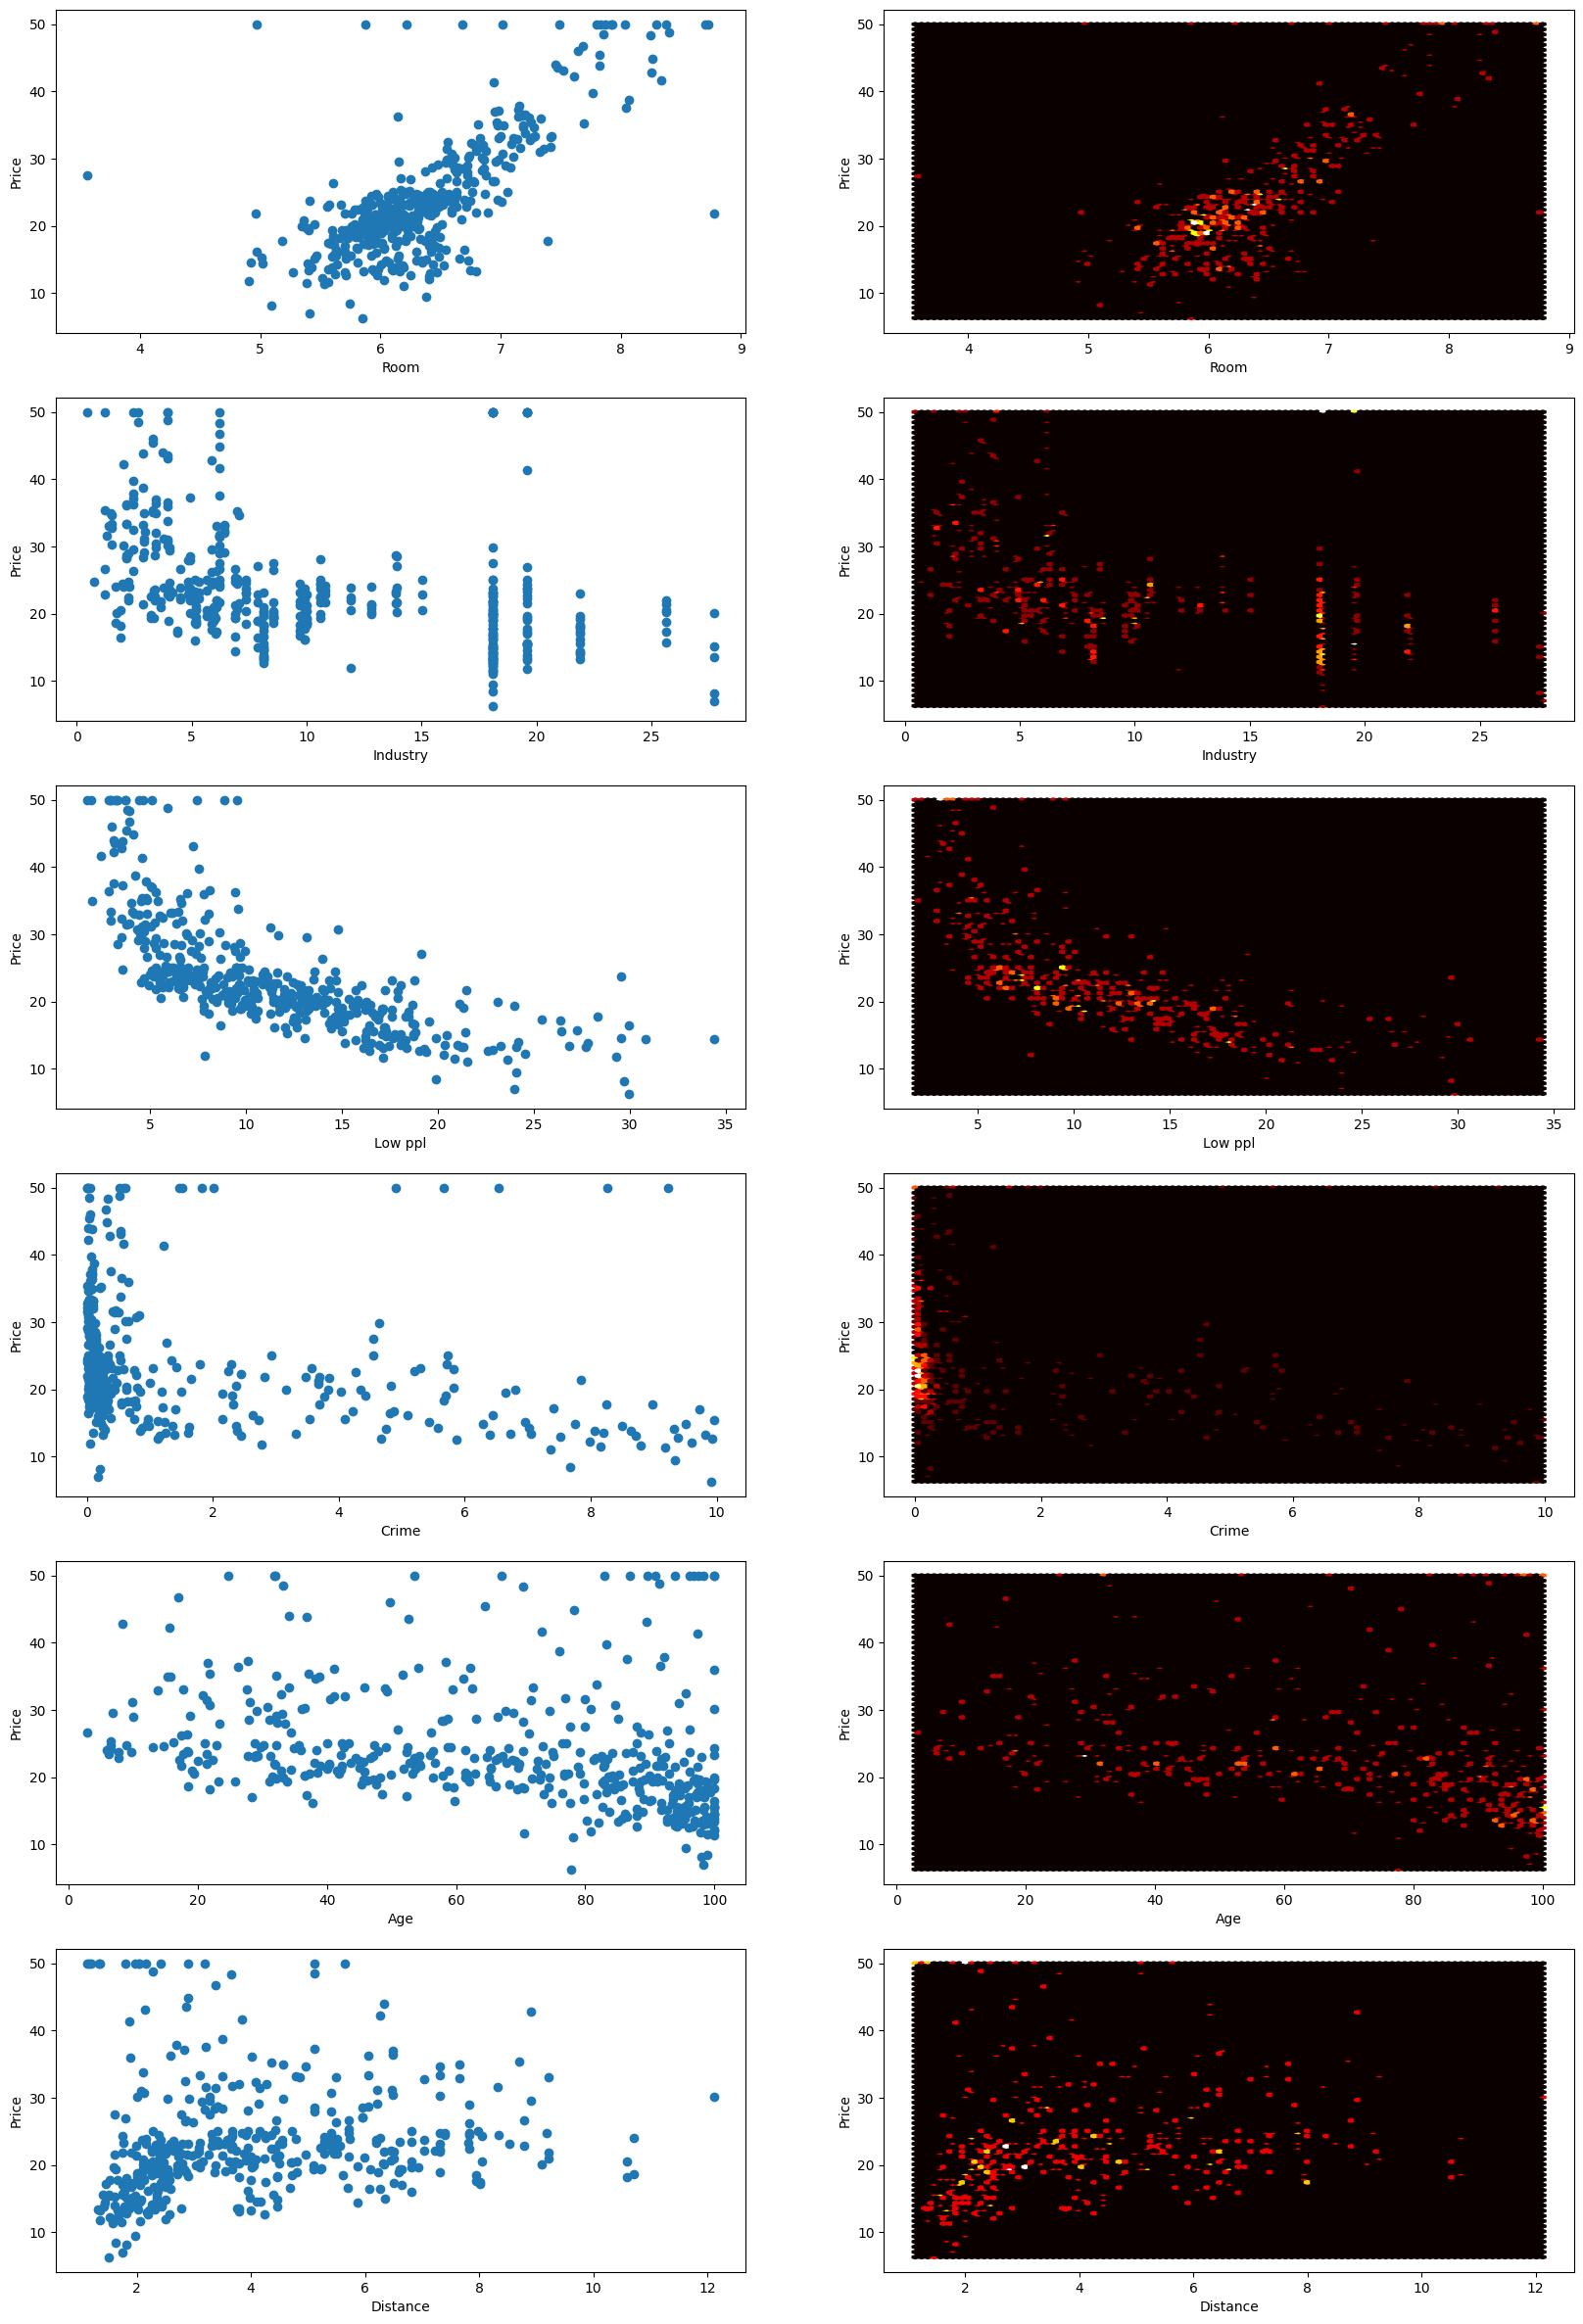

In [5]:
def draw_scatter_plots(df,cols):
    ncol, nrow = 2, len(cols)
    fig, ax = plt.subplots(ncols=ncol, nrows=nrow, figsize=(20, 30))
    for i in range(len(cols)):
        ax[i, 0].set_xlabel(cols[i])
        ax[i, 0].set_ylabel(target)
        ax[i, 0].scatter(df[cols[i]], df[target])
        ax[i, 1].hexbin(df[cols[i]],df[target],cmap='hot')
        ax[i, 1].set_xlabel(cols[i])
        ax[i, 1].set_ylabel(target)
        
        
cols = ["Room", "Industry", "Low ppl", "Crime", "Age", "Distance"]
draw_scatter_plots(df, cols=cols)

Based on above scatter plots we could understand that:
- there appears to be a strong linear relationship between feature *Room* and target *Price*.
- Also target variable seems to have a quadratic relationships with *Low ppl* and *Industry* feature. 
- The feature Distance is weakly correlated with the target.
- Some outliers aside, It seems that older houses have less prices. 
- If we ignore the large amount of data points with almost zero crime rate, rest of them  are negatively correlated with the target which os logical.

## Correlation Coefficient:
It measures the linear relationship between two variables. It has a value between -1 (perfect negative correlation) and 1 (perfect positive correlation), with 0 showing that there is no correlation. So the closer the absolute value of it gets to one, the stronger connection there is between variables.

The Pearson correlarion coefficient is calculated as follows:

### $ r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2 \sum_{i=1}^{n} (Y_i - \bar{Y})^2}} $

Strong correlation between Room and Gas
Strong correlation between Distance and Gas
Strong correlation between Distance and Room
Strong correlation between Highway and Gas
Strong correlation between Highway and Room
Strong correlation between Highway and Distance


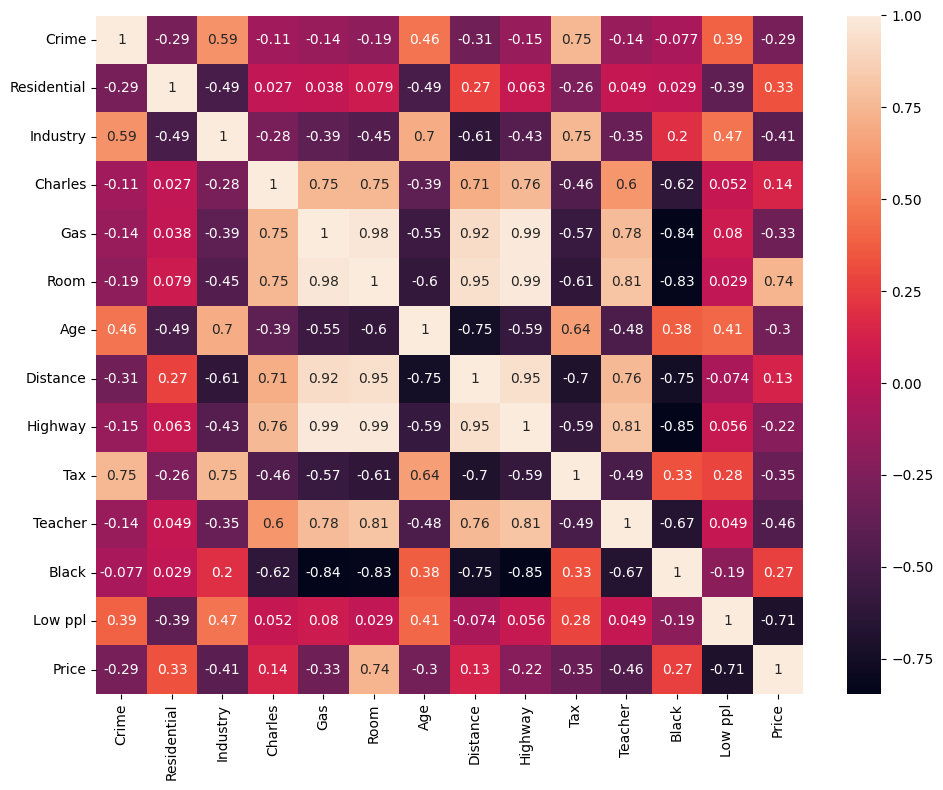

In [6]:
def find_possible_correlations(df, correlation_coefficient_threshold):
    df_corr = df.corr()
    is_correlated_columns = False
    for c1 in df_corr.columns:
        for c2 in df_corr.index:
            if c1 == c2:
                break
            if (abs(df_corr[c1][c2]) > correlation_coefficient_threshold):            
                print(f"Strong correlation between {c1} and {c2}")
                is_correlated_columns = True
    if not is_correlated_columns:
        print("Didn't found any two correlated column")

find_possible_correlations(df, 0.9)

def generate_heatmap(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True)
    plt.tight_layout()
    plt.show()

generate_heatmap(df=df)

As you can see there are some high values not on the main diagonal (of course each feature is perfectly correalted with itself). before jumping to any conclusion, It's important to remember that correlation does not imply causation. Two variables might have a high correlation coefficient, but it doesn't necessarily mean one of them causes the other. There might be a hidden third feature affecting both of them. Here are some facts we could understand from the above information:
- correlation between each two of the Gas, Distance and Room is really close to 1 which means they're perfectly positively correlated, but it's obvious they're not related. The feature affecting on all of them seems to be Highway. Houses near to highways are closer to factories and as a result get more harmful gasses. On the other hand Houses closer to Highways are often big and would probably have more rooms. Also the closer the houses get to highways, the further they get to the main employment centers.
- Most of the black people live near highways.
- A large amount of crimes happen near to industry areas.

#### *Which features have the most influence on the target value?*

In [7]:
dict(sorted(df.corr()[target].items(), key=lambda x: x[1], reverse=True))

{'Price': 1.0,
 'Room': 0.7401808048912722,
 'Residential': 0.33156988337122734,
 'Black': 0.26960517665953604,
 'Charles': 0.1366681067463208,
 'Distance': 0.1293546468007949,
 'Highway': -0.21790209732657045,
 'Crime': -0.28624498556871825,
 'Age': -0.29989319942852444,
 'Gas': -0.3327781813437544,
 'Tax': -0.34589756508999403,
 'Industry': -0.4119145308586557,
 'Teacher': -0.4612135552335436,
 'Low ppl': -0.7062550589221793}

## Mutual Information (MI):
The mutual information of two random variables is a measure of the mutual dependence between the two variables. It quantifies the "amount of information" obtained about one random variable by observing the other random variable. It's useful to identify non-linear relationships. Based on the continuously of the two variables, MI is calculated by one these three formulas:

$ MI(X; Y) = \sum_{x} \sum_{y} p(x, y) \log_2 \left(\frac{p(x, y)}{p(x) p(y)} \right) $

$ MI(X; Y) = \int_x \int_y p(x, y) \log\left(\frac{p(x, y)}{p(x) p(y)}\right) dx dy $

$ MI(X; Y) = \sum_x \int_y p(x, y) \log\left(\frac{p(x, y)}{p(x) p(y)}\right) dy $

In [8]:
def calc_mutual_info(df, target):
    feat_selector = mutual_info_regression(df.drop(target, axis=1), df[target])
    feat_importance_df = pd.DataFrame({'Features': df.columns.drop(target), 'Importance': feat_selector})
    feat_importance_df = feat_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
    return feat_importance_df

calc_mutual_info(df.dropna(), target)

,Features,Importance
0,Low ppl,0.591900
1,Room,0.506544
2,Industry,0.381563
3,Age,0.353461
4,Gas,0.347621
5,Teacher,0.333556
6,Crime,0.281769
7,Tax,0.252130
8,Distance,0.171818
9,Highway,0.157389


# Preprocessing the Dataset

### *How to Handle Missing Data?*

As we saw in the EDA part it seems that some columns contain missing values. Before going any further we have to find suitable approaches to fill the missing values. Some methods to handle null data:

1. *Deletion:* Simply remove the entire row/column containing at least one null value.
- Pros: Simple and easy to implement.
- Cons: Loss of potentially valuable data; may introduce bias if missing values are not randomly distributed.
2. *Mean/Median/Mode:* Another simple approach is to replace missing values with the mean/median/mode of other available data points.
- Pros: Simple and easy to implement; maintains the data distribution.
- Cons: May not accurately represent the true values; reduces the standard deviation.
3. *Prediction:* Filling missing values based on other available and more importantly, related features.
- Pros: Retains all data; can help maintain the structure of the dataset.
- Cons: Imputed values may not accurately represent real values; may introduce bias if not done carefully.
4. *KNN Imputation:* Impute missing values based on similar observations.
- Pros: Considers relationships between variables.
- Cons: Not computationally the optimal way.
5. *Machine Learning Algorithms:* Train a model to predict missing values based on other features.
- Pros: Can handle complex relationships between variables; potentially more accurate than the previous mentioned methods.
- Cons: Requires significant computation; may overfit if not carefully controlled.

In [9]:
print("Original dataset size:", len(df) )
print("numof missing values:", len(df) - len(df.dropna()) )
print("numof target missing values:", len(df) - len(df.dropna(subset=[target])) )
print("numof non-target missing values:", len(df.drop(target, axis=1)) - len(df.drop(target, axis=1).dropna()) )

Original dataset size: 506
numof missing values: 115
numof target missing values: 54
numof non-target missing values: 73


Not considering the target column, There are $ 73 $ rows containing at least one missing value. It might doesn't seem such a big deal but with the small amount of data we're provided with, This is about $ 14.5\% $ of the whole dataset. So we have to be carefull when handling them to avoid any biases and in out dataset. 

1. *Charles*: As we saw earlier this is the least significant feature of the dataset and we'll probably drop it in feature engineering step. So filling with mode value seems fine.

In [10]:
df["Charles"]  = df["Charles"].fillna(df["Charles"].mode()[0])

2. *Distance:* The third mentioned method seems reliable in this case. We'll use the Highway feature as predictor. What we do is for each data point with missing Distance we'll see the Highway value of it (H) and gather non-null Distance values of all the rows with Highway value of H. Now using fitness proportionate method we select a Distance value for it. Here's the code:

In [11]:
def calc_alternative_value_probs(filtered_df, null_col):
    counts = filtered_df[null_col].value_counts()

    value, freq = list(counts.keys()), list(counts.values)
    return {value[i]: (freq[i] / len(filtered_df)) for i in range(len(value))}
    
def fill_missings(df, null_col, related_col):
    for i in range(len(df)):
        if not pd.isnull(df[null_col][i]):
            continue
        probs = calc_alternative_value_probs(df[df[related_col]== df[related_col][i]].reset_index(drop=True), null_col)
        alternative_value = random.choices(population=list(probs.keys()), weights=list(probs.values()), k=1)[0]
        df[null_col][i] = alternative_value
        
import warnings
warnings.filterwarnings("ignore")
fill_missings(df, "Distance", "Highway")

3. *Black:* The histogram showed that this feature hasn't much diversity and is focused around a specific value. We have to choose between mode/median/mean.
- Since this is a continuous variable, Mode is not an option.
- Median is out because of the same reason.
- Considering the right skewness of the histogram Mean isn't good either.
Because of the continuously of the feature we'll break it into some intervals and choose the mean of most frequented interval.

In [12]:
k = 10
interval_bins = np.linspace(min(df["Black"]), max(df["Black"]), k + 1)
interval_labels = [i for i in range(1, len(interval_bins))]
df['Black interval'] = pd.cut(df["Black"], bins=interval_bins, labels=interval_labels, include_lowest=True)
df["Black"]  = df["Black"].fillna(df['Black interval'].value_counts().max())
df = df.drop("Black interval", axis=1)

4. *Price:* This is the most important column and we'll apply more accurate mathods on it. I tested several regression models and Random Forest was the best of them based on $ \text{MSE, MAE and } R^2 $ loss functions.

In [13]:
df_train = df[pd.isnull(df[target]) == False]
X_train, y_train = df_train.drop(target, axis=1), df_train[target]
df_test = df[pd.isnull(df[target]) == True]
X_test, y_test = df_test.drop(target, axis=1), df_test[target]

RF_pred = RandomForestRegressor().fit(X_train, y_train).predict(X_test)

for i, index in enumerate(df.index[df[target].isnull()]):
    df.at[index, target] = RF_pred[i]

Just to be sure we'll compare the statistical measures before and after filling missing values. 

In [14]:
res = pd.concat([df_before_preprocess[target].describe().transpose(), df[target].describe().transpose()], axis=1)
res.columns = ["before", "after"]
res

,before,after
count,452.000000,506.000000
mean,23.750442,24.977745
std,8.808602,9.080876
min,6.300000,6.300000
25%,18.500000,19.000000
50%,21.950000,22.750000
75%,26.600000,31.500000
max,50.000000,50.000000


### *Are we allowed to drop some of the features?*
Droping a feature is only logical if:
- It's not much related to the target value.
- There exists another feature that causes this feature and gives the same information. keeping both of them wouldn't be computationally efficient.

We can check the existence of the above situations by referring to the calculated MIs and PCCs.

In [15]:
df = df.drop(["Distance", "Charles"], axis=1)

### *Numerical & Categorical features*
- *Categorical:* represents attributes that have a finite set of distinct values or categories. These values are usually not ordered and do not have a mathematical relationship with each other. Categorical features can be further classified into Nominal or Ordinal.
- *Numerical Features:* have numerical values. These values have a mathematical relationship. There are two main types of numerical features. Continuous or Discrete

I think all of the features in our dataset are numerical except for *Charles*.

### *Normalization & Standardization*
- *Normalization:* It is the process of scaling data into the range of zero to one.
### $$ \frac{x - x_{min}}{x_{max} - x_{min}} $$
- *Standardization:* It results in a distribution that is centered around 0, with a standard deviation of 1.
### $$ \frac{x - \mu}{\sigma} $$
We need to scale all features in the same range in order to have a better regression models.

In [16]:
def normalize_data(data):
    min, max = data.min(), data.max()
    return (data - min) / (max - min)
def standardize_data(data):
    mu, sd = data.mean(), data.std()
    return (data - mu) / sd

df = df.apply(lambda x: normalize_data(x))

### *Preprocessing non-numerical features*
1. *Labeling:* To process the categorical columns, one of the possible methods is labeling in such a way that each of the
categories is replaced by a number.
2. *Separating:* sometimes we could extract important numerical features from them. For example if our dataset contained a column *Date* which represented the date in form of *YYYY-MM-DD* spliting it into three numerical features whould be logical.

### *Train, Validation & Test data*
1. *Train:* It is examples used during the learning process and is used to fit the parameters of classifier or regressor. The goal is to produce a fitted model that generalizes well to unseen data.

2. *Validation:* Also known as Held-out data. It is examples used to tune the hyperparameters of a classifier. The validation data set is used to compare performances of the models fitted using training data and decide which one to take.

3. *Test:* It is examples used only to assess the performance of classifier.

In [17]:
degree = 2
cols = ['Highway', 'Low ppl', "Price", "Room"]

train_size = 0.8
train_indexes = np.random.choice(df.index, round(len(df) * train_size), replace=False)
df_train = df.loc[train_indexes].reset_index(drop=True)
df_test = df.drop(train_indexes).reset_index(drop=True)

### *Machine Learning Types*
1. *Supervised Learning:* Labeled data, learns to predict output labels.
2. *Unsupervised Learning:* Unlabeled data, identifies patterns and relationships.
3. *Semi-Supervised Learning:* Utilizes both labeled and unlabeled data, combines supervised and unsupervised techniques.
4. *Reinforcement Learning:* Trains an agent to make decisions through trial and error, learns an optimal policy for maximizing rewards.

### *Regression vs Classification*
They are both supervised machine learning methods. Regression is focused on predicting continuous values, while classification groups discrete data points based on similarities. They're different in evaluation too.
- Evaluation metrics for continuous variables (Regression): $ MSE, MAE, RMSE, R^2.$
- Evaluation metrics for discrete variables (Classification): Accuracy, Precision, Recall, F1.

## Linear Regression
Given a set of training data points $x \to f(x)$ we are going to find a line in form of $y = ax + b$ which best explains the training data points. Depends on how we define *best* the line whould be different. We define best line as the line with least mean squared error (MSE). 

$$ \text{Estimate } \alpha \to \hat{\alpha} \quad \quad \text{Estimate } \beta \to \hat{\beta} \quad \quad \text{Estimate } y = \alpha x + \beta \to \hat{y} = \hat{\alpha} x + \hat{\beta} $$

$$ \frac{\partial MSE}{\partial \beta} = \frac{2}{n} \sum_{i}^n \frac{\partial(y_i - \hat{y}_i)}{\partial \beta} \times (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i}^n \frac{\partial(\alpha x_i + \beta - \hat{\alpha} x_i - \hat{\beta})}{\partial \beta} \times (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i}^n 1 \times (\alpha x_i + \beta - \hat{\alpha} x_i - \hat{\beta}) = 0 $$
$$ n \times \hat{\beta} = \sum_{i}^n (\alpha x_i + \beta - \hat{\alpha} x_i) \quad \to \quad \hat{\beta} = \frac{1}{n} \sum_{i}^n (y_i - \hat{\alpha} x_i) \quad \to \quad \hat{\beta} = \frac{1}{n} \sum_{i}^n y_i - \frac{\hat{\alpha}}{n} \sum_{i}^n  x_i \quad \to \quad \hat{\beta} = \bar{y} - \hat{\alpha}\bar{x} $$

$$ \frac{\partial MSE}{\partial \alpha} = \frac{2}{n} \sum_{i}^n \frac{\partial(y_i - \hat{y}_i)}{\partial \alpha} \times (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i}^n \frac{\partial(\alpha x_i + \beta - \hat{\alpha} x_i - \hat{\beta})}{\partial \alpha} \times (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i}^n x_i \times (\alpha x_i + \beta - \hat{\alpha} x_i - \hat{\beta}) = 0 $$
$$ \to \sum_{i}^n \hat{\alpha} x_i^2 = \sum_{i}^n x_i \times (y_i - \hat{\beta}) \quad \to \quad \sum_{i}^n \hat{\alpha} x_i^2 = \sum_{i}^n x_i \times (y_i - \bar{y}) + \hat{\alpha}x_i\bar{x} $$
$$ \to \sum_{i}^n \hat{\alpha} x_i(x_i - \bar{x}) = \sum_{i}^n x_i \times (y_i - \bar{y}) \quad \to \quad \hat{\alpha} \times (\sum_{i}^n (x_i^2) - n \times \bar{x}^2) = (\sum_{i}^n x_i y_i) - n \times \bar{x}\bar{y} $$
$$ \to \hat{\alpha} = \frac {n \times \bar{x}\bar{y} - \sum_{i}^n (x_i y_i)} {n \times \bar{x}^2 - \sum_{i}^n (x_i^2)} \quad \to \quad \hat{\alpha} = \frac {\bar{x}\bar{y} - \frac{1}{n} \times \sum_{i}^n (x_i y_i)} {\bar{x}^2 - \frac{1}{n} \times \sum_{i}^n (x_i^2)} \quad \to \quad \hat{\alpha} = \frac {mu(x)mu(y) - mu(xy)} {mu(x)^2 - mu(x^2)} $$

In [18]:
def train_linear_regression_model(X, Y):
    n = len(X)
    x_mu = sum(X) / n
    y_mu = sum(Y) / n
    
    x2_mu = sum([X[i] * X[i] for i in range(n)])
    xy_mu = sum([X[i] * Y[i] for i in range(n)])
    
    estimated_alpha = (x_mu * y_mu - xy_mu) / (x_mu * x_mu - x2_mu)
    estimated_beta = y_mu - estimated_alpha * x_mu
    
    return [estimated_alpha, estimated_beta]

def polynomial_regression(x, y, degree):
    X = np.column_stack([x**i for i in range(degree + 1)])
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

def predict(coefficients, X, degree):
    return sum([coefficients[i] * X**i for i in range(degree + 1)])

def train_models(cols, degree):
    coef = dict()
    for i in range(len(cols)):
        col = cols[i]
        if degree == 1:
            coef[col] = train_linear_regression_model(X=df_train[col], Y=df_train[target])
        else:
            coef[col] = polynomial_regression(x=df_train[col], y=df_train[target], degree=degree)
    return coef

models = train_models(cols=cols, degree=degree)

def make_predictions(cols, models, degree):
    preds = dict()
    for i in range(len(cols)):
        col = cols[i]
        preds[col] = predict(coefficients=models[col], X=df_test[col], degree=degree)
    return preds

preds = make_predictions(cols=cols, models=models, degree=degree)

### *Which feature will best explain the target?*
Pearson correlation coefficient is a measure of linear relationship between two variables. Based on that the features Room and Low ppl will probably have the best performance among all features.

### *Loss Functions*

#### $ \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

#### $ \text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

#### $ \text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

#### $R^2 = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

#### $\bar{R}^2 = 1 - \left(1 - R^2\right)\frac{n-1}{n-p-1}$

### *Differences between $ {R}^{2} $ & $ \text{Adjusted } {R}^{2} $*
$R^2$ measures the strength of the relationship between the dependent and independent variables, while $\bar{R}^2$ provides a more reliable measure of the model's goodness-of-fit by considering the number of variables in the model. Also $ R^2 $ tends to increase as you add more variables to the model, even if those variables don't significantly contribute to the model's predictive power. $ \bar{R}^2 $ only increases if the new variable improves the model's performance more than what would be expected by chance.


In [19]:
def calc_MSE(y_pred_vals, y_true_vals):
    n = len(y_true_vals)
    SE = 0 # squared error
    for i in range(n):
        SE += (y_true_vals[i] - y_pred_vals[i])**2
    MSE = SE / n
    return MSE

def calc_MAE(y_pred_vals, y_true_vals):
    n = len(y_true_vals)
    AE = 0 # absolute error
    for i in range(n):
        AE += abs(y_true_vals[i] - y_pred_vals[i])
    MAE = AE / n
    return MAE
    
def calc_RMSE(y_pred_vals, y_true_vals):
    RMSE = np.sqrt(calc_MSE(y_pred_vals, y_true_vals))
    return RMSE

def calc_R2(y_pred_vals, y_true_vals):
    n = len(y_true_vals)
    RSS, TSS = 0, 0
    mu = np.mean(y_true_vals)
    for i in range(n):
        RSS += (y_true_vals[i] - y_pred_vals[i]) ** 2
        TSS += (y_true_vals[i] - mu) ** 2
    return 1 - (RSS / TSS)

def calc_Adjusted_R2(y_pred_vals, y_true_vals, p):
    R2 = calc_R2(y_pred_vals, y_true_vals)
    n = len(df)
    adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - 1 - p)
    return adjusted_R2

In [20]:
def analyse_model(cols, preds, degree):
    res = []
    y_true = df_test[target]
    for col in cols:
        MSE_test = calc_MSE(preds[col], y_true)
        MAE_test = calc_MAE(preds[col], y_true)
        RMSE_test = calc_RMSE(preds[col], y_true)
        R2_test = calc_R2(preds[col], y_true)
        Adj_R2_test = calc_Adjusted_R2(preds[col], y_true, degree)

        res.append({'MSE': MSE_test, 'MAE': MAE_test, 
            'RMSE': RMSE_test, 'R-squared': R2_test,
            'Adj R-squared': Adj_R2_test})
    return pd.DataFrame(res, index=cols)

analyse_model(cols=cols, preds=preds, degree=degree)

,MSE,MAE,RMSE,R-squared,Adj R-squared
Highway,3.753195e-02,1.284132e-01,1.937317e-01,0.096435,0.092843
Low ppl,2.531062e-02,1.198063e-01,1.590931e-01,0.390658,0.388236
Price,1.522377e-29,3.552714e-15,3.901765e-15,1.000000,1.000000
Room,3.511631e-02,1.290481e-01,1.873935e-01,0.154591,0.151229


As expected the *Low ppl* feature was the most linearly related to the target.

## Polynomial Regression

Polynomial regression models the relationship between a dependent variable (y) and one independent variable (x) as an nth degree polynomial. Unlike linear regression, which assumes a linear relationship between the variables, polynomial regression allows for a more complex, nonlinear relationship.

$$f(x) = \sum_{i=0}^n \beta_i x^i = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

Like we did in linear regression, We're going to minimize the MSE.

$$ \frac{\partial MSE}{\partial \beta_j} = \frac{\partial (\frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2) } {\partial \beta_j} = \frac{1}{n} \sum_{i=0}^n \frac{\partial ( (y_i - \hat{y}_i)^2) } {\partial \beta_j} = \frac{2}{n} \sum_{i=0}^n \frac {\partial (y_i - \hat{y}_i) } {\partial \beta_j} \times (y_i - \hat{y}_i) = \frac{2}{n} \sum_{i=0}^n x^j \times (y_i - \hat{y}_i) = 0 \\ \sum_{i=0}^n x^j (y_i - \hat{y}_i) = 0 \quad \quad \text{ for each } j \in \{0, 1, \ldots, n\} $$

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^j$ represents the feature vector of $x$ raised to the power of $j$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression


### *Gradient Descent*

Given a starting point we update the current weights by moving in the negative gradient direction.

The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.

### *Polynomial Regression Using Gradient Descent*

Steps are as follows:
- *Choosing a loss function:* We'll use MSE and try to minimize it.
- *Initializing the coefficients:* We'll set all of them as 0.5
- *Update the coefficients using Gradient Descent:* We'll Iteratively update the coefficients to minimize the MSE and repeat the process until the algorithm converges to the optimal answer.

In [21]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

def standardize_features(chosen_features, df):
    for feature in chosen_features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df

def predict_output(feature_matrix, weights, bias):
    predictions = np.dot(feature_matrix, weights) + bias
    return predictions

def gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    weights = np.array(initial_weights)
    while True:
        predictions = np.dot(feature_matrix, weights)
        errors = predictions - output
        gradient = 2 * np.dot(feature_matrix.T, errors)
        weights -= step_size * gradient
        
        if np.linalg.norm(gradient) < tolerance:
            break
    
    return weights


def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    weights = np.array(initial_weights)
    
    while True:
        # Compute predictions using polynomial function and errors
        predictions = np.dot(feature_matrix, weights) + bias
        errors = predictions - outputs
        
        # Compute derivatives for all weights
        gradients = np.dot(feature_matrix.T, errors)
        
        # Update weights and bias
        weights -= step_size * gradients
        bias -= step_size * np.mean(errors)
        
        # Check convergence
        if np.linalg.norm(gradients) < tolerance:
            break
    
    return weights, bias


def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias


def get_weights_and_bias(chosen_features, col):
    chosen_feature_matrix = df[[col]].values
    target_matrix = df[target].values
    
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }
    
    train_weights, bias = run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords)
    
    return chosen_feature_matrix, train_weights, bias

## Visualization of Regression

In [22]:
def draw_scatter(degree, models, preds, cols):
    ncol, nrow = 2, len(cols)
    _, ax = plt.subplots(ncols=ncol, nrows=nrow, figsize=(20, 25))
    for i in range(len(cols)):
        col = cols[i]

        y_pred = preds[col]        
        x_values = np.linspace(df_train[col].min(), df_train[col].max(), 100)
        y_values = [predict(coefficients=models[col], X=x, degree=degree) for x in x_values]
        
        ax[i, 0].scatter(df_test[col], df_test[target])
        ax[i, 0].scatter(df_test[col], y_pred)
        ax[i, 0].plot(x_values, y_values, color='purple')
        ax[i, 0].set_xlabel("Independent Variable")
        ax[i, 0].set_ylabel("Dependent Variable")
        ax[i, 0].set_title(f"Predicted by {col}")
        ax[i, 0].legend(["Actual Values", "Predicted Values"])
        
        ax[i, 1].scatter(y_pred, df_test[target])
        ax[i, 1].plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='purple')
        ax[i, 1].set_xlabel("Actual Target Value")
        ax[i, 1].set_ylabel("Predicted Target Value")
        ax[i, 1].set_title(f"Predicted by {col}")

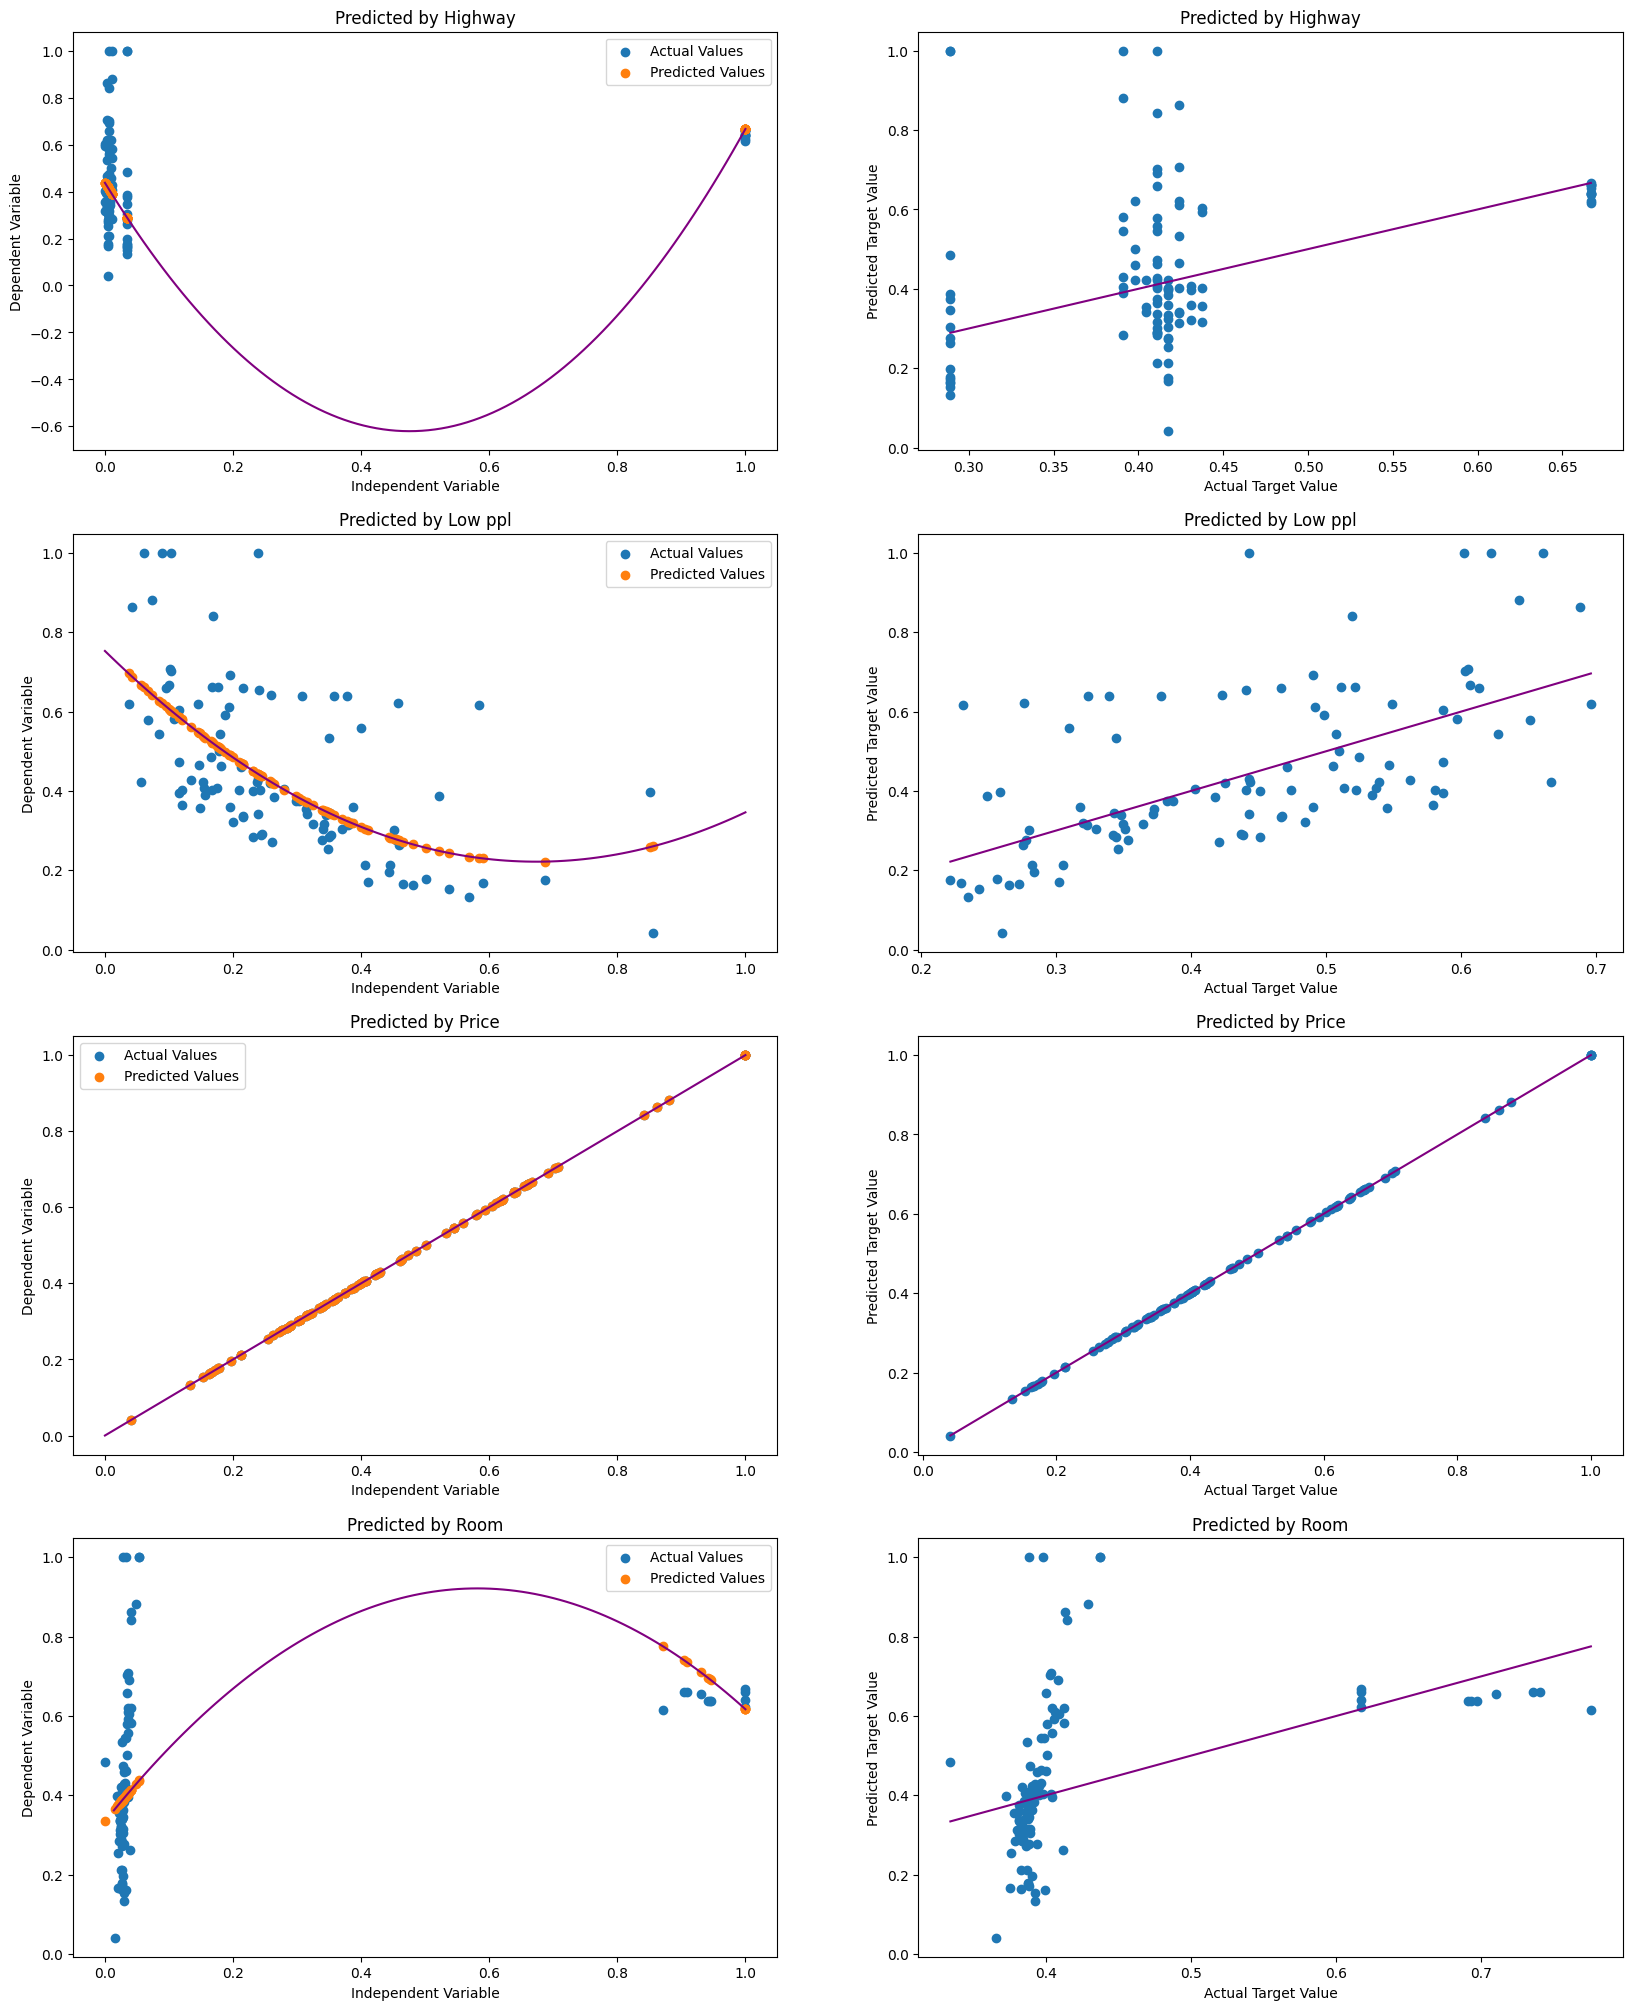

In [23]:
draw_scatter(degree=degree, models=models, preds=preds, cols=cols)

## Classification

In [24]:
degree = 2
cols = ['Highway', 'Low ppl', "Price"]
train_size = 0.8
train_indexes = np.random.choice(df.index, round(len(df) * train_size), replace=False)
df_train = df.loc[train_indexes].reset_index(drop=True)
df_test = df.drop(train_indexes).reset_index(drop=True)

In order to perform classification algorithms on the dataset, We have to create a categorical target feature and group our data based on that. The price values are splitted into ten equal-sized groups. The two high deciles are labeled as *High*, the two down deciles are labeled as *Low* and de deciles in between are labeled as *Mid*.

In [25]:
def add_categorized_target(df):
    df["Deciles"] = pd.qcut(df[target], 10, labels=False)
    df["catPrice"] = df["Deciles"].apply(lambda x: "Low" if x < 2 else "Mid" if x < 8 else "High")
    return df.drop("Deciles", axis=1)
df = add_categorized_target(df)

X_train, X_test, y_train, y_test = train_test_split(df.drop(["Price", "catPrice"], axis=1), df["catPrice"], test_size=0.2, random_state=17)

## Decision Tree
#### *What is pruning?*
It is a technique used to simplify and optimize the decision tree model by removing sections of the tree that give not much of a information about the target variable. Helps to reduce overfitting. It involves the following steps:
- Bulding a complete tree.
- Starting from bottom (leaves of the tree) and going up to Identify interior nodes with a low impact on the overall accuracy.
- Deleting the nodes with p-chance less than a specific threshold.
#### *Why not pruning while biulding a tree?*
The node we're deleting might lead to important infirmation later in the deeper layers. But when we start from the bottom of the tree we're sure that this wouldn't happen.
#### *Decision Tree in camparison with other supervised learning algorithms*
- Pros: Unlike NNs and ensemble methods which are other sepervised learning methods it is easy to understand and explain. It can handle both numerical and categorical data. It also doesn't have any hyperparameter. Decision trees are computationally less complicated than the oter algorithms.
- Cons: It can easily overfit if not properly pruned. Hardly discoveres non-linear/complex relationships. It finds one of the local optimums.
On the other hand, other supervised learning methods like logistic regression, random forests, or neural networks have better performance on unseen data.

### K-Nearest Neighbors
#### *KNN in camparison with other supervised learning algorithms*
It's a lazy learner. Meaning that it holds all computational efforts until classification or regression time and doesn't learn from training data. On the other hand NN is a eager learning method which learns during the process of training.
KNN is affected by outliers. It is also very sensitive to the scale of the features. Close valueof data points makes them difficult to separate.
#### *One Nearest Neighbor*
It's a specific case of KNN where k is one. It classifies a new data point based on the class of its closest neighbor.
- Pros: 1NN is simple and easy to implement. Like KNN, It does not require a training phase.
- Cons: For a new data point it calculates the distance between it and all the other data points and as a result is computationally expensive. Since it considers only a single nearest neighbor, it is highly sensitive to the noisy data points.
#### *Calculating distance between two data points*
1. Euclidean distance: The most common distance metric used in KNN. $$ \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2 + \ldots} $$
2. Manhattan distance: $$ | \Delta x | + | \Delta y | + | \Delta z | + \ldots $$
3. Minkowski distance: It's a generalized form of both Euclidian and Manhattan distance. function.
$$ \sqrt[p]{|\Delta x|^p + |\Delta y|^p + |\Delta z|^p + \ldots} $$

We have to find a reasonable value for *k* first.

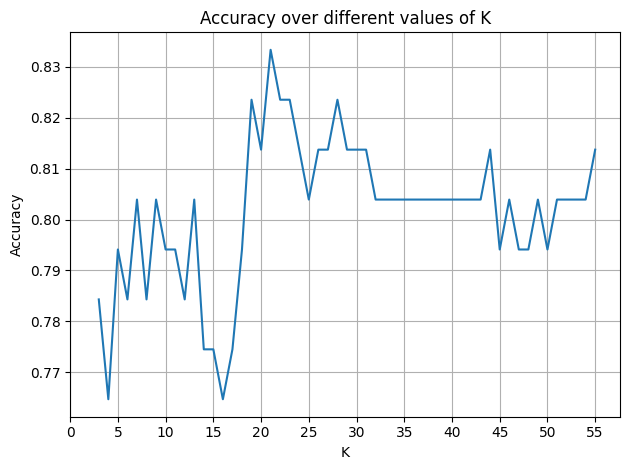

In [26]:
rng = range(3, 56)
def find_best_k(rng):
    accuracies = [accuracy_score(y_true=y_test, y_pred=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X=X_test)) for k in rng]
    plt.plot(rng, accuracies)
    plt.grid(True)
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over different values of K")
    plt.xticks([k for k in range(0, 56, 5)])
    plt.tight_layout()
    plt.show()

find_best_k(rng=rng)

The accuracies are really close. Best of them occured at $ k = 49 $ which isn't computationally reasonable. If we want to choose a model that is both accurate and efficient $ k = 9 $ seems fine.

In [27]:
def compare_models(models, names):
    for i in range(2):
        print(f"{names[i]} Accuracy on test data:", round(100 * accuracy_score(y_true=y_test, y_pred=models[i].predict(X_test)), 2))
        print(f"{names[i]} Accuracy on train data:", round(100 * accuracy_score(y_true=y_train, y_pred=models[i].predict(X_train)), 2))

DT_model = DecisionTreeClassifier(random_state=17, criterion="gini", max_depth=4, max_leaf_nodes=5, max_features=8).fit(X_train, y_train)
KNN_model = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
compare_models([DT_model, KNN_model], ["Decision Tree", "K-nearest neighbors"])

Decision Tree Accuracy on test data: 87.25
Decision Tree Accuracy on train data: 87.13
K-nearest neighbors Accuracy on test data: 80.39
K-nearest neighbors Accuracy on train data: 85.15


The models are a little overfitted but not much. Meaning that they're still accurate with new, unseen data.

### *Grid Search Cross Validation*
It iterates through every combination of hyperparameters, fits the model with each combination using cross-validation, and evaluates the performance of the model with those hyperparameters and selects the best hyperparameters by comparing the cross-validation scores.

In [28]:
def find_best_params(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, return_train_score=True)
    grid_search.fit(X=X_train, y=y_train)
    print("Top Accuracy:", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)
    # grid_search.cv_results_

In [29]:
KNN_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
find_best_params(KNeighborsClassifier(), KNN_params)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


Top Accuracy: 0.8242283950617285
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [30]:
DT_params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
find_best_params(DecisionTreeClassifier(), DT_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Top Accuracy: 0.8441049382716048
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


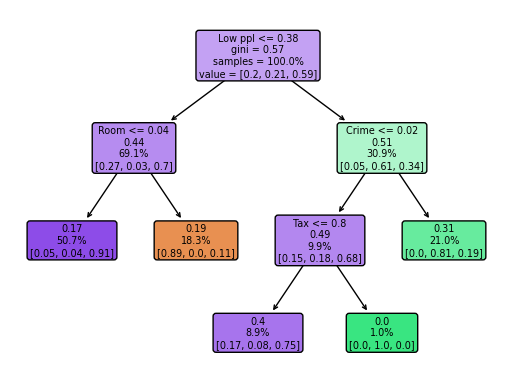

In [31]:
def visualize_decision_tree(model):
    plot_tree(decision_tree=model, feature_names=model.feature_names_in_,
          label="root", filled=True, impurity=True, node_ids=False,
          proportion=True, rounded=True, precision=2)
visualize_decision_tree(model=DT_model)

## Ensemble
Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the learning algorithms alone.
- Each model has pros and cons of itself. combining them leads to a model with combination of strong points of all of them. They'd probably cover each others' weak points too.
- An ensemble method aggregates the predictions of its base models. Averaging the predictions of different models helps to prevent overfitting.

#### *Bagging, Boosting & Random Forest*
At first, all three of them take different samples of the training data with the same size. The sampling is with replacement which means some samples may appear multiple times in a single subset, while others might not be included at all. This is called *Bootstrapping*.
1. *Bagging:* It fits different models, each based on a sample as its training data. Now for each new, unseen data point, it'll ask the opinion of all the models and assign the class to the most frequented answer. How does it help to prevent overfitting? Assume we have 3 models. First two models predict a new data as class A and the third model predicts it as class B. Probably it belongs to A and the third model is wrong here. If we'd only ask the opinion of the third model we'd think it's B but it was the effect of overfitting. 
2. *Boosting:* It learns sequentially. Meaning that in each iteration it takes the model of previous one and covers its weak spots in order to improve the model.
3. *Random Forest:* Like bagging method it also trains a model based on each training data sample. The difference between them is that in bagging each tree consideres all provided features and as a result most of the trees would probably give similar answers to unseen data. On the other hand random forest method fits each tree on a completely random subset of features. Helps to train more diverse models in order to have a stronger generalization.
#### *Bootstrapping*
It is often used to create diverse models that can be combined to improve overall performance. Bootstrapping helps reduce variance by combining predictions from multiple models trained on different datasets, leading to more reliable predictions.
#### *Numof Decision Trees*
The choice of the number of decision trees is a trade-off between reducing bias (underfitting) and variance (overfitting) in the model. Too few DTs might lead to underfitting. The model may not be able to capture the patterns in the data, leading to poor predictive performance. On the other hand, having too many DTs can lead to overfitting. This also increases computational complexity and training time.

#### *Hyperparameters of Random Forest*

- *n_estimatorsint:* The number of trees in the forest.

- *criterion:* The function to measure the quality of a split. options are gini, entropy and log_loss.

- *max_depth:* The maximum depth of the tree. If None, then there wouldn't be any limit.

- *max_features:* The number of features to consider when looking for the best split. Options are sqrt, log2 and no limit at all.

- *max_samplesint:* If bootstrap is True, the number of samples to draw from X to train each base estimator.

- *bootstrapbool:* Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

In [32]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_params = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10],
    'max_features': [5, 10],
    "bootstrap": [False, True]
}
find_best_params(model=RandomForestClassifier(), param_grid=RF_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Top Accuracy: 0.8739197530864196
Best parameters: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150}


Now that we've found the optimal hyperparameters, Let's fit the model.

In [33]:
RF_model = RandomForestClassifier(n_estimators=150, criterion="log_loss", max_depth=10, max_features=5, bootstrap=True)
RF_model.fit(X=X_train, y=y_train)
niggruh = 17

## Support Vector Machine
The main goal of the SVM is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes. The logic is to maximize the margin between the closest points of different classes as possible. The dimension of the hyperplane depends upon the number of features.


In [34]:
RBF_svc = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
linear_svc = SVC(kernel='linear').fit(X_train, y_train)

compare_models([RBF_svc, linear_svc], ["RBF", "Linear"])

RBF Accuracy on test data: 81.37
RBF Accuracy on train data: 77.23
Linear Accuracy on test data: 83.33
Linear Accuracy on train data: 79.21


The RBF model seems to be overfitted while the linear model does great on both seen and unseen data.

## Evaluation Metrics
In the case of binary classification, evaluation metrics are defined as followed:
### *Confusion Matrix*
It has four values:
- True Positive (TP): The number of correct positive predictions.
- True Negative (TN): The number of correct negative predictions.
- False Positive (FP): The number of incorrect positive predictions.
- False Negative (FN): The number of incorrect negative predictions.

The following metrics can be calculated from the four values of confusion matrix:

- *Accuracy:* the proportion of correct predictions made by the model out of all the predictions made by it. It is How often the model makes correct predictions. It's high even if the model is very cautious
$$ \frac {TP + TN} {TP + TN + FP + FN} = \frac {T} {T + F} $$

- *Precision:* the proportion of correct predictions made by the model out of all the predictions to the value. It shows us how precise the model is when predicting the positive class. It is the ratio of correctly predicted positives to the total predicted positives.
$$ \frac {TP} {TP + FP} = \frac {TP} {P} $$

- *Recall:* the proportion of correct predictions made by the model out of all the observations on that model. It tells us how good the model is at finding all positive instances.
$$ \frac {TP} {TP + FN} $$

- *F1 Score:* mean of $\frac{1}{Precision}$ and $\frac{1}{Recall}$ Also knows as harmonic mean. providing a single metric that balances the effects of both.
$$ \frac{1}{F1} = \frac{1}{2} (\frac{1}{Recall} + \frac{1}{Precision}) \quad \to \quad F1 = 2 \times \frac{Precision \times Recall} {Precision + Recall} $$

As you know our target has three classes. So the confusion matrix would be $3 \times 3$ where $A_{ij}$ means the number of data points labeled as $j$ with actual value of $i$. Lets rewrite the mentioned formulas again with new definition of confusion matrix.

$$ \text{Accuracy } = \frac {\sum_{i=1}^3 A_{ii}} {\sum_{i=1}^3 \sum_{j=1}^3 A_{ij}} \quad \quad \quad \text{Precision } = \frac {A_{ii}} {\sum_{j=1}^3 A_{ij}} \quad \quad \quad \text{Recall } = \frac {A_{ii}} {\sum_{j=1}^3 A_{ji}} $$

In [35]:
SVC_pred = linear_svc.predict(X=X_test)
confusion_matrix(y_true=y_test, y_pred=SVC_pred)

array([[ 9,  0,  9],
       [ 0, 11,  6],
       [ 1,  1, 65]], dtype=int64)

In [36]:
print(classification_report(y_true=y_test, y_pred=SVC_pred))

              precision    recall  f1-score   support

        High       0.90      0.50      0.64        18
         Low       0.92      0.65      0.76        17
         Mid       0.81      0.97      0.88        67

    accuracy                           0.83       102
   macro avg       0.88      0.71      0.76       102
weighted avg       0.85      0.83      0.82       102



Let's analyse all the trained classification models together.

In [37]:
def analyse_models(models):
    res = []
    for model in models:
        predicts = model.predict(X=X_test)
        res.append({
        "Accuracy": accuracy_score(y_true=y_test, y_pred=predicts),
        "Precision": precision_score(y_true=y_test, y_pred=predicts, average="macro"),
        "Recall": recall_score(y_true=y_test, y_pred=predicts, average="macro"),
        "F1": f1_score(y_true=y_test, y_pred=predicts, average="macro")
        })
    return res
    
models = [DT_model, KNN_model, RF_model, RBF_svc, linear_svc]
pd.DataFrame(analyse_models(models=models), index=["Decision Tree", "KNN", "Random Forest", "RBF SVM", "Linear SVM"])

,Accuracy,Precision,Recall,F1
Decision Tree,0.872549,0.848039,0.836162,0.841851
KNN,0.803922,0.777778,0.718987,0.738563
Random Forest,0.911765,0.919974,0.854973,0.883541
RBF SVM,0.813725,0.861357,0.652977,0.713086
Linear SVM,0.833333,0.876389,0.705736,0.761944


As expected KNN was the least accurate model. Both DT and RF did great but since RF is a forest of DTs, Its scores are a little higher. SVMs Also did fine but not as good as the Trees.

## References
Dr Fadaei's videos recorded in the COVID-19 pandemy.

Dr Bahrak's lectures in Data Science.
- [Statistical Charts](https://github.com/DataScience-ECE-UniversityOfTehran/DataScience-Spring2024/blob/main/lectures/Lecture%203.%20Statistical%20Charts.pdf)
- [Sampling and Scientific Studies](https://github.com/DataScience-ECE-UniversityOfTehran/DataScience-Spring2024/blob/main/lectures/Lecture%202.%20Sampling%20and%20Scientific%20Studies.pdf)
- [Data Preprocessing](https://github.com/DataScience-ECE-UniversityOfTehran/DataScience-Spring2024/blob/main/lectures/Lecture%209.%20Data%20Preprocessing.pdf)
- [SKlearn & Feature Engineering](https://github.com/DataScience-ECE-UniversityOfTehran/DataScience-Spring2024/blob/main/lectures/Lecture%2012.%20Sklearn%20%26%20Feature%20Engineering.pdf)
- [Linear Regression](https://github.com/DataScience-ECE-UniversityOfTehran/DataScience-Spring2024/blob/main/lectures/Lecture%206.%20Linear%20Regression.pdf)
- [Gradient Descent](https://github.com/DataScience-ECE-UniversityOfTehran/DataScience-Spring2024/blob/main/lectures/Lecture%2011.%20Gradient%20Descent.pdf)

Geeks for Geeks.
- [Dealing with missing data](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
- [SVM](https://www.geeksforgeeks.org/support-vector-machine-algorithm/)

Wikipedia.
- [Polynomial Regression](https://en.wikipedia.org/wiki/Polynomial_regression)